In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, skew, kurtosis, spearmanr, mannwhitneyu

# Loading data

In [2]:
resultados = pd.read_excel('resultados.xlsx', skiprows=9)

resultados.dropna(how='all', inplace=True)

resultados.columns = ['codigo_participante', 'sexo', 'idade', 'Barthel', 'pergunta_surpresa',
                      'NECPAL', 'NECPAL +', 'oncologica', 'pulmonar', 'cardiaca', 'demencia',
                      'fragilidade', 'neurologica_vascular', 'neurologica_degenerativa',
                      'hepatica', 'insuficiencia_renal', 'PPS']


resultados.head()

,codigo_participante,sexo,idade,Barthel,pergunta_surpresa,NECPAL,NECPAL +,oncologica,pulmonar,cardiaca,demencia,fragilidade,neurologica_vascular,neurologica_degenerativa,hepatica,insuficiencia_renal,PPS
0,1,1,86,35,1,5,1,0,0,0,1,1,0,0,0,0,40
1,2,0,80,55,0,2,0,0,1,0,1,0,0,0,0,0,70
2,3,1,94,50,0,2,0,0,1,0,1,1,0,0,0,0,60
3,4,1,93,35,1,1,1,0,0,0,1,1,0,0,0,0,60
4,5,1,76,20,0,3,0,0,0,0,1,1,0,0,0,0,50


In [3]:
# 0 - Female
# 1 - Male

# Pergunta surpresa: the physician asks colleagues if they think a specific patient will pass away within the next year
    # 0 - no
    # 1 - yes

## Basic inspection

In [4]:
resultados.describe()

,codigo_participante,sexo,idade,Barthel,pergunta_surpresa,NECPAL,NECPAL +,oncologica,pulmonar,cardiaca,demencia,fragilidade,neurologica_vascular,neurologica_degenerativa,hepatica,insuficiencia_renal,PPS
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,29.000000,0.614035,83.421053,63.508772,0.473684,2.578947,0.438596,0.105263,0.210526,0.315789,0.473684,0.421053,0.087719,0.017544,0.035088,0.105263,68.947368
std,16.598193,0.491150,7.990949,29.184831,0.503745,2.137650,0.500626,0.309620,0.411306,0.468961,0.503745,0.498117,0.285401,0.132453,0.185637,0.309620,19.427908
min,1.000000,0.000000,66.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,15.000000,0.000000,77.000000,40.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000
50%,29.000000,1.000000,85.000000,75.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
75%,43.000000,1.000000,89.000000,90.000000,1.000000,4.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,90.000000
max,57.000000,1.000000,95.000000,100.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [5]:
# No NaNs

# Looking at the data

## Distribution of indices - Barthel, PPS, NECPAL

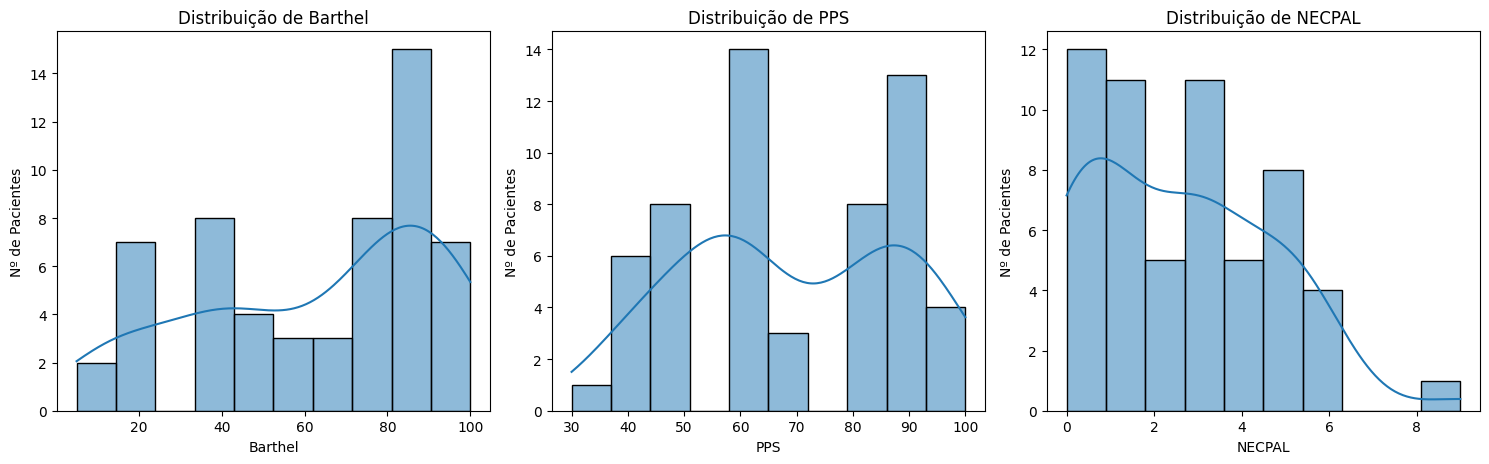

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=resultados, x='Barthel', bins=10, kde=True, ax=axes[0])
axes[0].set_ylabel('Nº de Pacientes')
axes[0].set_title('Distribuição de Barthel')

sns.histplot(data=resultados, x='PPS', bins=10, kde=True, ax=axes[1])
axes[1].set_ylabel('Nº de Pacientes')
axes[1].set_title('Distribuição de PPS')

sns.histplot(data=resultados, x='NECPAL', bins=10, kde=True, ax=axes[2])
axes[2].set_ylabel('Nº de Pacientes')
axes[2].set_title('Distribuição de NECPAL')

#fig.suptitle('Distribuição de escalas', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('distribuicao_scores.png')
plt.show()

In [7]:
# Distributions are not normal (bimodal?)

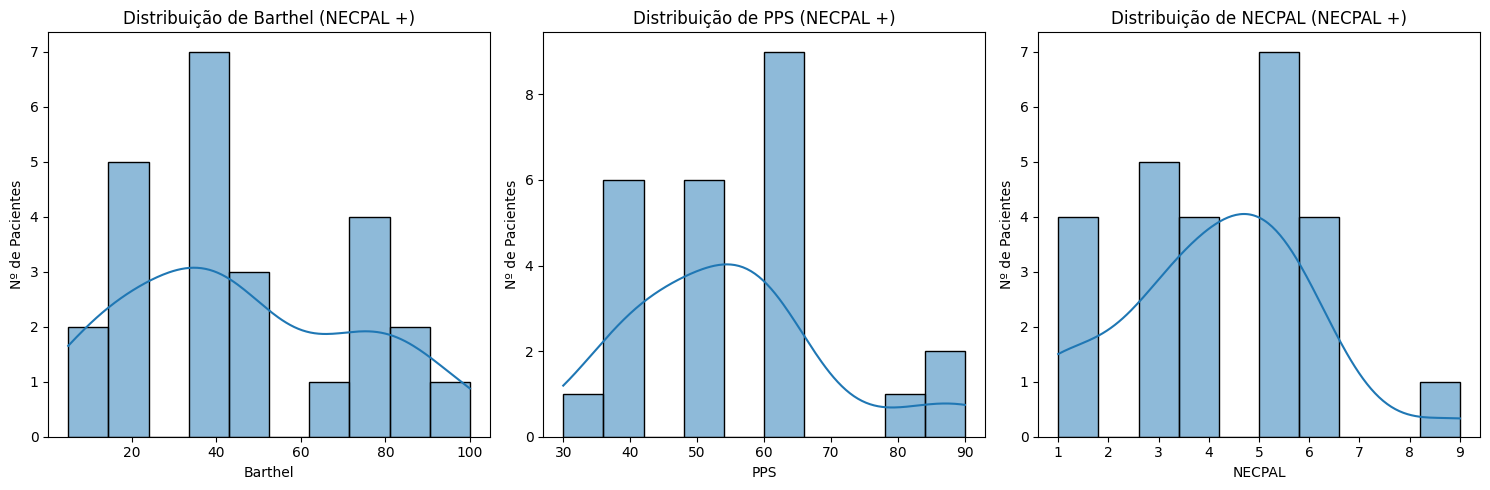

In [8]:
necpal_positive = resultados[resultados['NECPAL +'] == 1]

fig, necpal_axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=necpal_positive, x='Barthel', bins=10, kde=True, ax=necpal_axes[0])
necpal_axes[0].set_title('Distribuição de Barthel (NECPAL +)')
necpal_axes[0].set_ylabel('Nº de Pacientes')

sns.histplot(data=necpal_positive, x='PPS', bins=10, kde=True, ax=necpal_axes[1])
necpal_axes[1].set_title('Distribuição de PPS (NECPAL +)')
necpal_axes[1].set_ylabel('Nº de Pacientes')

sns.histplot(data=necpal_positive, x='NECPAL', bins=10, kde=True, ax=necpal_axes[2])
necpal_axes[2].set_title('Distribuição de NECPAL (NECPAL +)')
necpal_axes[2].set_ylabel('Nº de Pacientes')

plt.tight_layout()
plt.savefig('distribuicao_scores_necpal_positive.png')
plt.show()

## Comorbidities - count

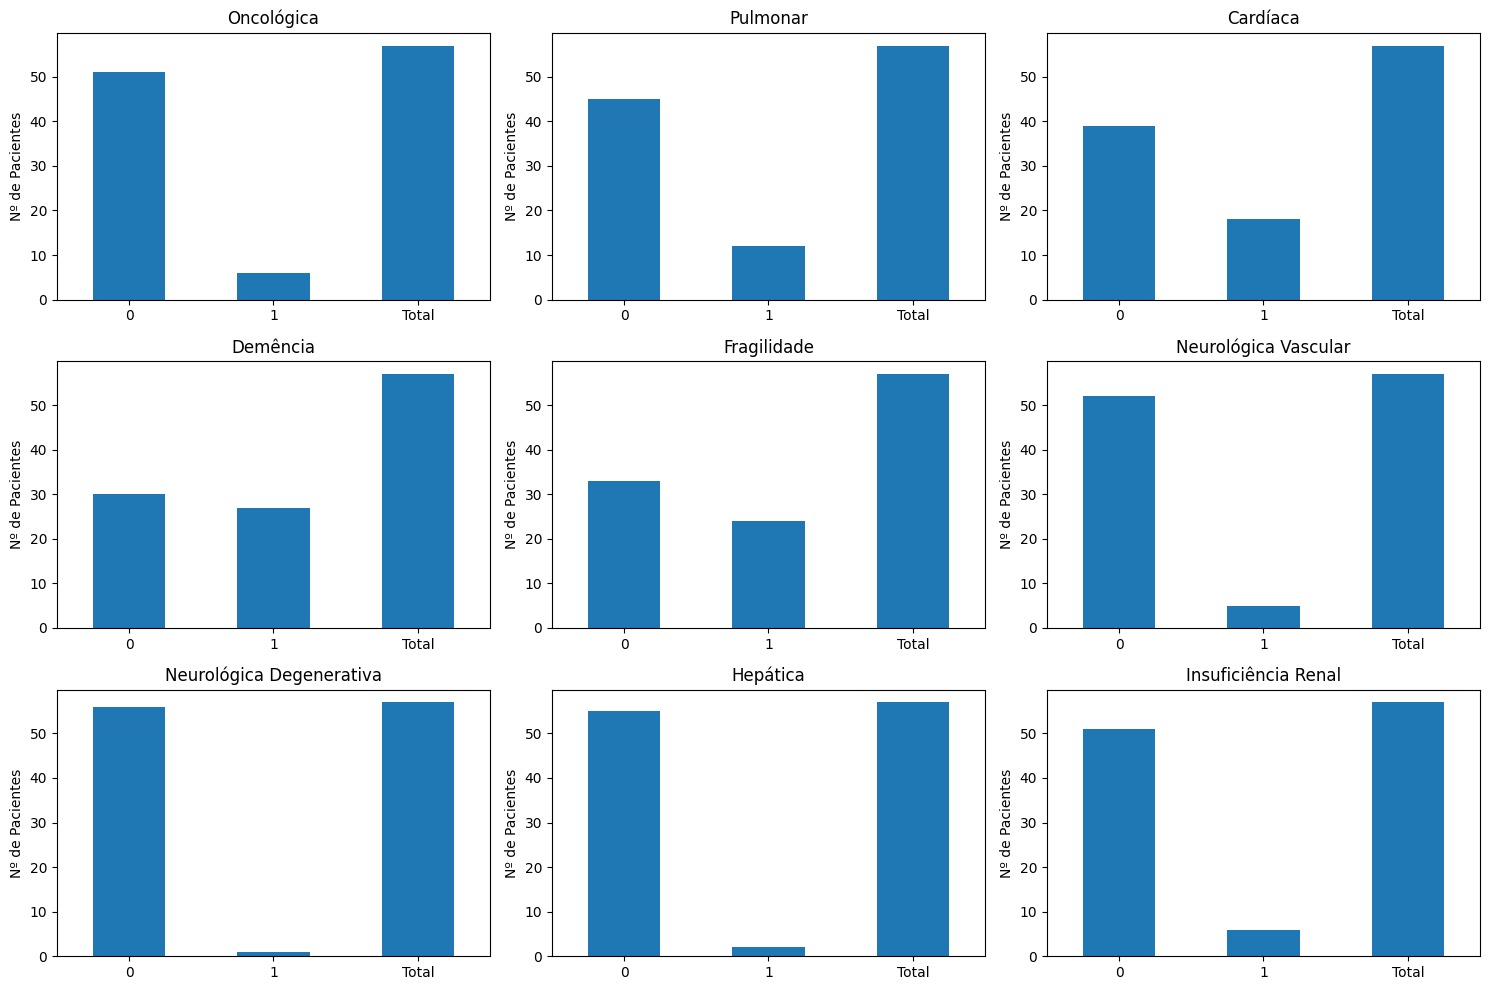

In [9]:
condition_labels = ['Oncológica', 'Pulmonar', 'Cardíaca', 'Demência', 'Fragilidade', 
                    'Neurológica Vascular', 'Neurológica Degenerativa', 'Hepática', 
                    'Insuficiência Renal']

conditions = ['oncologica', 'pulmonar', 'cardiaca', 'demencia', 'fragilidade', 
              'neurologica_vascular', 'neurologica_degenerativa', 'hepatica', 
              'insuficiencia_renal']

total_patients = resultados.shape[0]

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for condition, condition_label, ax in zip(conditions, condition_labels, axes.flatten()):
    issue_counts = resultados[condition].value_counts().reindex([0, 1], fill_value=0)
    issue_counts['Total'] = total_patients 

    issue_counts.plot(kind='bar', ax=ax, legend=False)
    ax.set_title(condition_label) 
    ax.set_xlabel('')
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['0', '1', 'Total'], rotation=0)
    ax.set_ylabel('Nº de Pacientes')

plt.tight_layout()
plt.savefig('comorbidades_pacientes.png')
plt.show()


## Sex Count

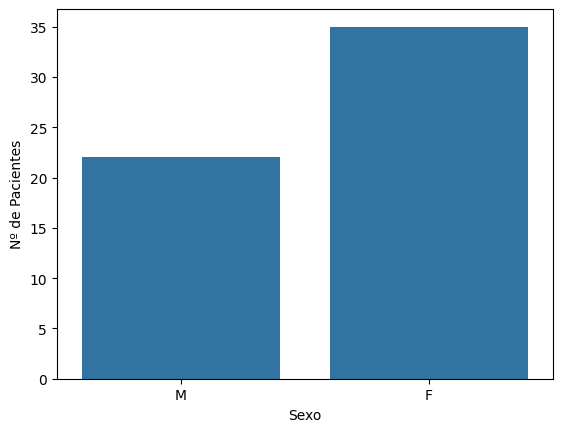

In [10]:
sns.countplot(x='sexo', data=resultados)
#plt.title('Gender Distribution')
plt.xticks([0, 1], ['M', 'F'])
plt.xlabel('Sexo')
plt.ylabel('Nº de Pacientes')
plt.savefig('sexo_pacientes.png')
plt.show()


## Scores by sex

/tmp/ipykernel_3416/3461027822.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['M', 'F'])
/tmp/ipykernel_3416/3461027822.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['M', 'F'])
/tmp/ipykernel_3416/3461027822.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['M', 'F'])


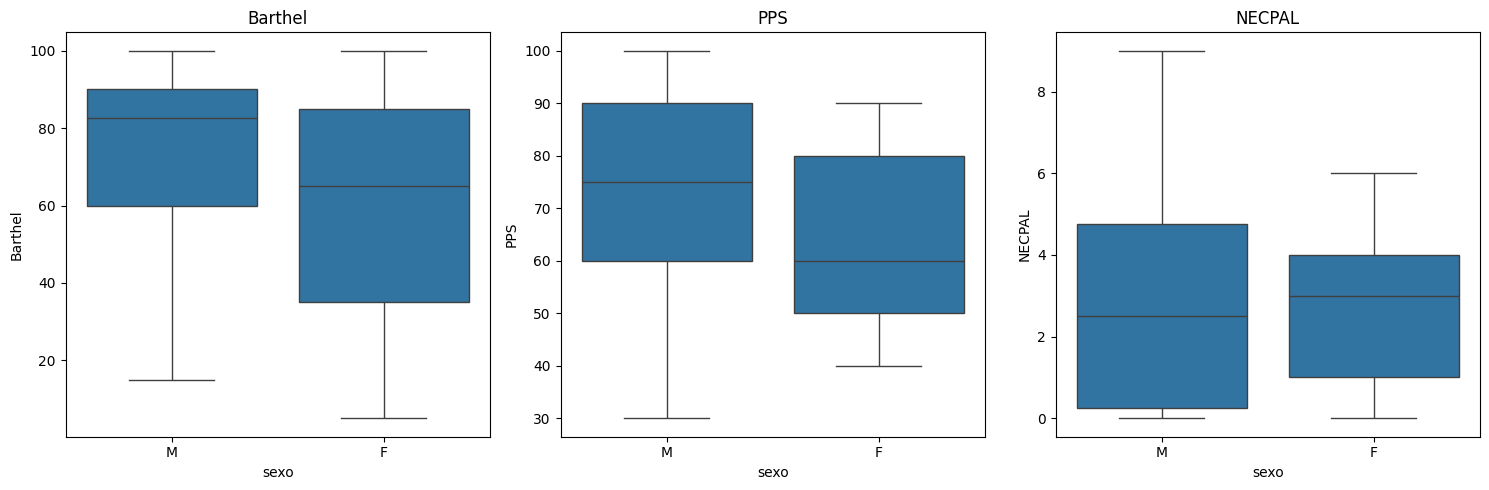

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='sexo', y='Barthel', data=resultados, ax=axes[0])
sns.boxplot(x='sexo', y='PPS', data=resultados, ax=axes[1])
sns.boxplot(x='sexo', y='NECPAL', data=resultados, ax=axes[2])
axes[0].set_xticklabels(['M', 'F'])
axes[1].set_xticklabels(['M', 'F'])
axes[2].set_xticklabels(['M', 'F'])
axes[0].set_title('Barthel')
axes[1].set_title('PPS')
axes[2].set_title('NECPAL')
plt.tight_layout()
plt.savefig('distribuicao_sexo_cores.png')
plt.show()


## Age distribution

/tmp/ipykernel_3416/1341977027.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sexo_label', y='idade', data=resultados_copy, palette="viridis")


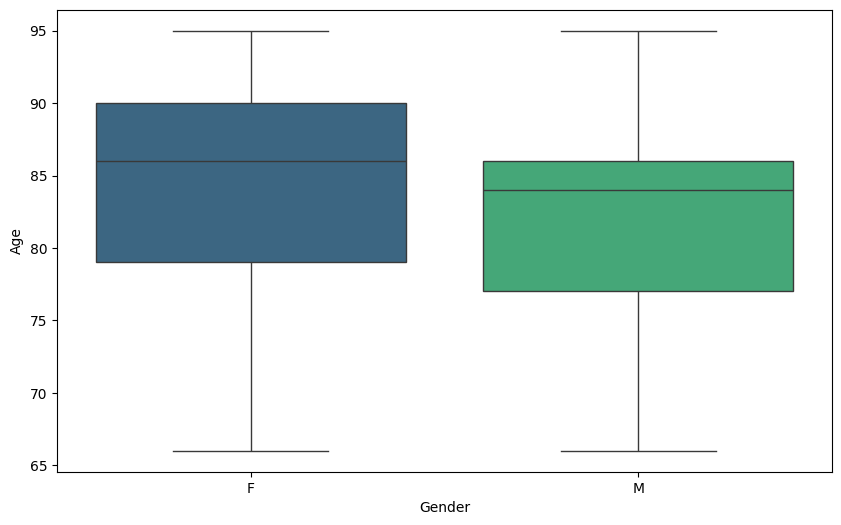

In [12]:
# Create a new column with labeled 'sexo' for plotting, without changing the original DataFrame
resultados_copy = resultados.copy()
resultados_copy['sexo_label'] = resultados_copy['sexo'].map({0: 'M', 1: 'F'})

# Boxplot for Age Distribution by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='sexo_label', y='idade', data=resultados_copy, palette="viridis")
#plt.title('Age Distribution by sex')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

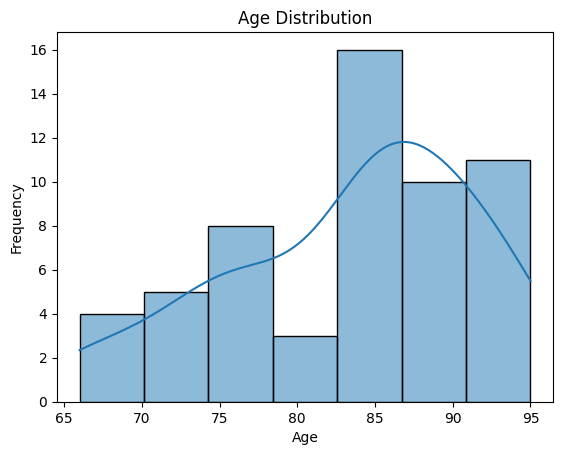

Median Age: 85.0
Standard Deviation of Age: 7.9909488271352815
Interquartile Range (IQR) of Age: 12.0


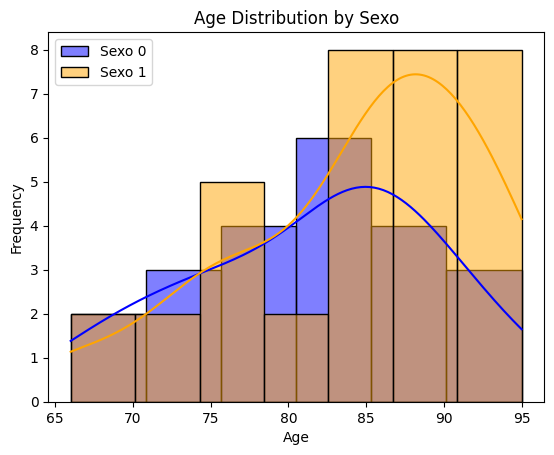

Median Age for Sexo 0: 84.0
Standard Deviation of Age for Sexo 0: 7.938208331553885
Interquartile Range (IQR) of Age for Sexo 0: 9.0
Median Age for Sexo 1: 86.0
Standard Deviation of Age for Sexo 1: 7.919765721006541
Interquartile Range (IQR) of Age for Sexo 1: 11.0


In [14]:
sns.histplot(resultados['idade'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


median = resultados['idade'].median()
std_dev = resultados['idade'].std()
iqr = resultados['idade'].quantile(0.75) - resultados['idade'].quantile(0.25)

print(f'Median Age: {median}')
print(f'Standard Deviation of Age: {std_dev}')
print(f'Interquartile Range (IQR) of Age: {iqr}')


sns.histplot(resultados[resultados['sexo'] == 0]['idade'], kde=True, color='blue', label='Sexo 0')
sns.histplot(resultados[resultados['sexo'] == 1]['idade'], kde=True, color='orange', label='Sexo 1')
plt.title('Age Distribution by Sexo')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


median_0 = resultados[resultados['sexo'] == 0]['idade'].median()
std_dev_0 = resultados[resultados['sexo'] == 0]['idade'].std()
iqr_0 = resultados[resultados['sexo'] == 0]['idade'].quantile(0.75) - resultados[resultados['sexo'] == 0]['idade'].quantile(0.25)

median_1 = resultados[resultados['sexo'] == 1]['idade'].median()
std_dev_1 = resultados[resultados['sexo'] == 1]['idade'].std()
iqr_1 = resultados[resultados['sexo'] == 1]['idade'].quantile(0.75) - resultados[resultados['sexo'] == 1]['idade'].quantile(0.25)

print(f'Median Age for Sexo 0: {median_0}')
print(f'Standard Deviation of Age for Sexo 0: {std_dev_0}')
print(f'Interquartile Range (IQR) of Age for Sexo 0: {iqr_0}')

print(f'Median Age for Sexo 1: {median_1}')
print(f'Standard Deviation of Age for Sexo 1: {std_dev_1}')
print(f'Interquartile Range (IQR) of Age for Sexo 1: {iqr_1}')

## Scores by age

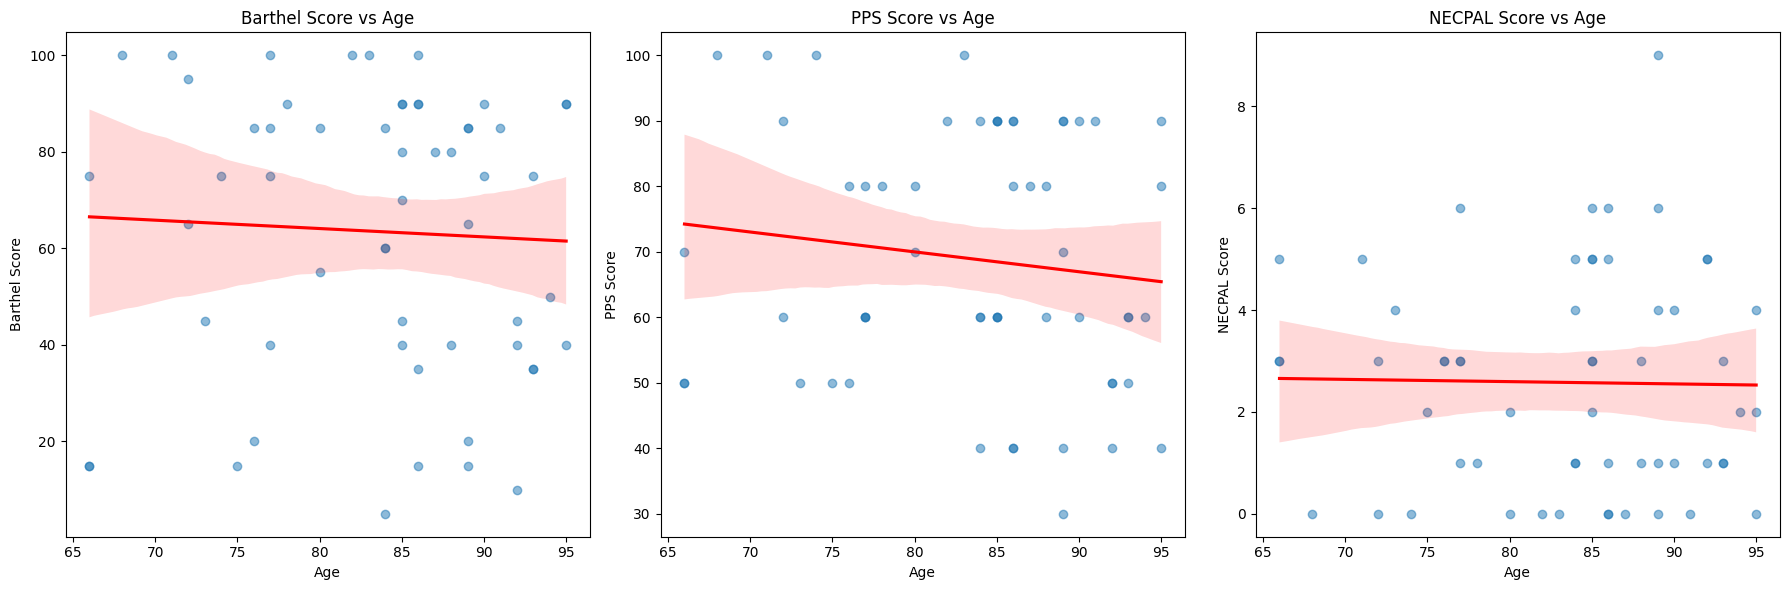

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.regplot(x='idade', y='Barthel', data=resultados, ax=axes[0], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[0].set_title('Barthel Score vs Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Barthel Score')

sns.regplot(x='idade', y='PPS', data=resultados, ax=axes[1], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[1].set_title('PPS Score vs Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('PPS Score')

sns.regplot(x='idade', y='NECPAL', data=resultados, ax=axes[2], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[2].set_title('NECPAL Score vs Age')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('NECPAL Score')

plt.tight_layout()
plt.show()

## Pergunta surpresa & NECPAL

/tmp/ipykernel_21618/2015621452.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pergunta_surpresa_0['NECPAL_bins'] = pd.cut(pergunta_surpresa_0['NECPAL'], bins=bins, labels=labels)
/tmp/ipykernel_21618/2015621452.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pergunta_surpresa_1['NECPAL_bins'] = pd.cut(pergunta_surpresa_1['NECPAL'], bins=bins, labels=labels)
/tmp/ipykernel_21618/2015621452.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

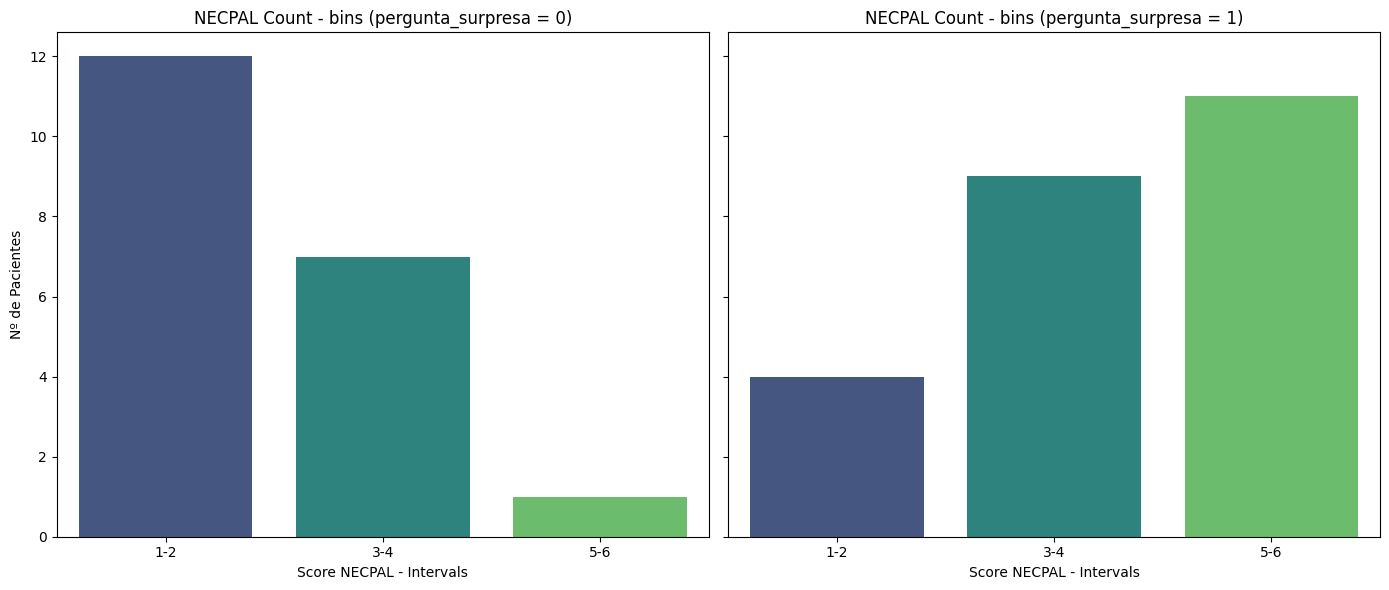

In [14]:
pergunta_surpresa_0 = resultados[resultados['pergunta_surpresa'] == 0]
pergunta_surpresa_1 = resultados[resultados['pergunta_surpresa'] == 1]

bins = [0, 2, 4, 6] 
labels = ['1-2', '3-4', '5-6']

pergunta_surpresa_0['NECPAL_bins'] = pd.cut(pergunta_surpresa_0['NECPAL'], bins=bins, labels=labels)
pergunta_surpresa_1['NECPAL_bins'] = pd.cut(pergunta_surpresa_1['NECPAL'], bins=bins, labels=labels)

necpal_counts_0 = pergunta_surpresa_0['NECPAL_bins'].value_counts().sort_index()
necpal_counts_1 = pergunta_surpresa_1['NECPAL_bins'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.barplot(x=necpal_counts_0.index, y=necpal_counts_0.values, palette="viridis", ax=axes[0])
axes[0].set_title('NECPAL Count - bins (pergunta_surpresa = 0)')
axes[0].set_xlabel('Score NECPAL - Intervals')
axes[0].set_ylabel('Nº de Pacientes')

sns.barplot(x=necpal_counts_1.index, y=necpal_counts_1.values, palette="viridis", ax=axes[1])
axes[1].set_title('NECPAL Count - bins (pergunta_surpresa = 1)')
axes[1].set_xlabel('Score NECPAL - Intervals')

plt.tight_layout()
plt.savefig('necpal_intervalos_pergunta_surpresa_side_by_side.png')
plt.show()

### Sum of comorbidities for each pergunta surpresa and NECPAL bins

Total conditions for NECPAL bin 1-2 (pergunta_surpresa = 0): 11
Total conditions for NECPAL bin 3-4 (pergunta_surpresa = 0): 9
Total conditions for NECPAL bin 5-6 (pergunta_surpresa = 0): 1
Total conditions for NECPAL bin 1-2 (pergunta_surpresa = 1): 9
Total conditions for NECPAL bin 3-4 (pergunta_surpresa = 1): 24
Total conditions for NECPAL bin 5-6 (pergunta_surpresa = 1): 31


/tmp/ipykernel_21618/643517671.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(condition_sums_0.keys()), y=list(condition_sums_0.values()), palette="viridis", ax=axes[0])
/tmp/ipykernel_21618/643517671.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(condition_sums_1.keys()), y=list(condition_sums_1.values()), palette="viridis", ax=axes[1])


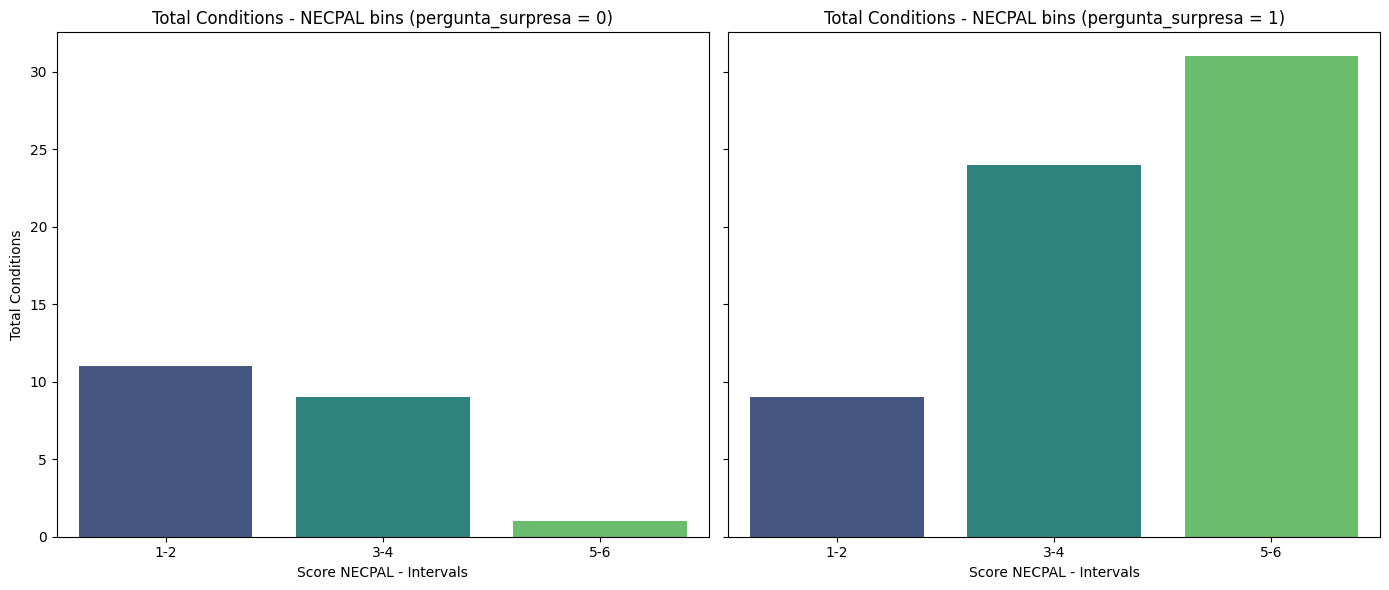

In [15]:
def sum_conditions_by_bin(group, group_name):
    condition_sums = {}

    for bin_label in labels:
        bin_data = group[group['NECPAL_bins'] == bin_label]
        # Sum conditions for the given NECPAL bin
        condition_sums[bin_label] = bin_data[conditions].sum(axis=1).sum()

        # Print the sum for this bin (optional)
        print(f"Total conditions for NECPAL bin {bin_label} ({group_name}): {condition_sums[bin_label]}")
    
    return condition_sums

condition_sums_0 = sum_conditions_by_bin(pergunta_surpresa_0, 'pergunta_surpresa = 0')
condition_sums_1 = sum_conditions_by_bin(pergunta_surpresa_1, 'pergunta_surpresa = 1')

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(x=list(condition_sums_0.keys()), y=list(condition_sums_0.values()), palette="viridis", ax=axes[0])
axes[0].set_title('Total Conditions - NECPAL bins (pergunta_surpresa = 0)')
axes[0].set_xlabel('Score NECPAL - Intervals')
axes[0].set_ylabel('Total Conditions')

sns.barplot(x=list(condition_sums_1.keys()), y=list(condition_sums_1.values()), palette="viridis", ax=axes[1])
axes[1].set_title('Total Conditions - NECPAL bins (pergunta_surpresa = 1)')
axes[1].set_xlabel('Score NECPAL - Intervals')

plt.tight_layout()
plt.savefig('total_conditions_necpal_bins_pergunta_surpresa.png')
plt.show()

## NECPAL + & Barthel

/tmp/ipykernel_21618/3656655.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  necpal_0['Barthel_bins'] = pd.cut(necpal_0['Barthel'], bins=bins, labels=labels)
/tmp/ipykernel_21618/3656655.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  necpal_1['Barthel_bins'] = pd.cut(necpal_1['Barthel'], bins=bins, labels=labels)
/tmp/ipykernel_21618/3656655.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legen

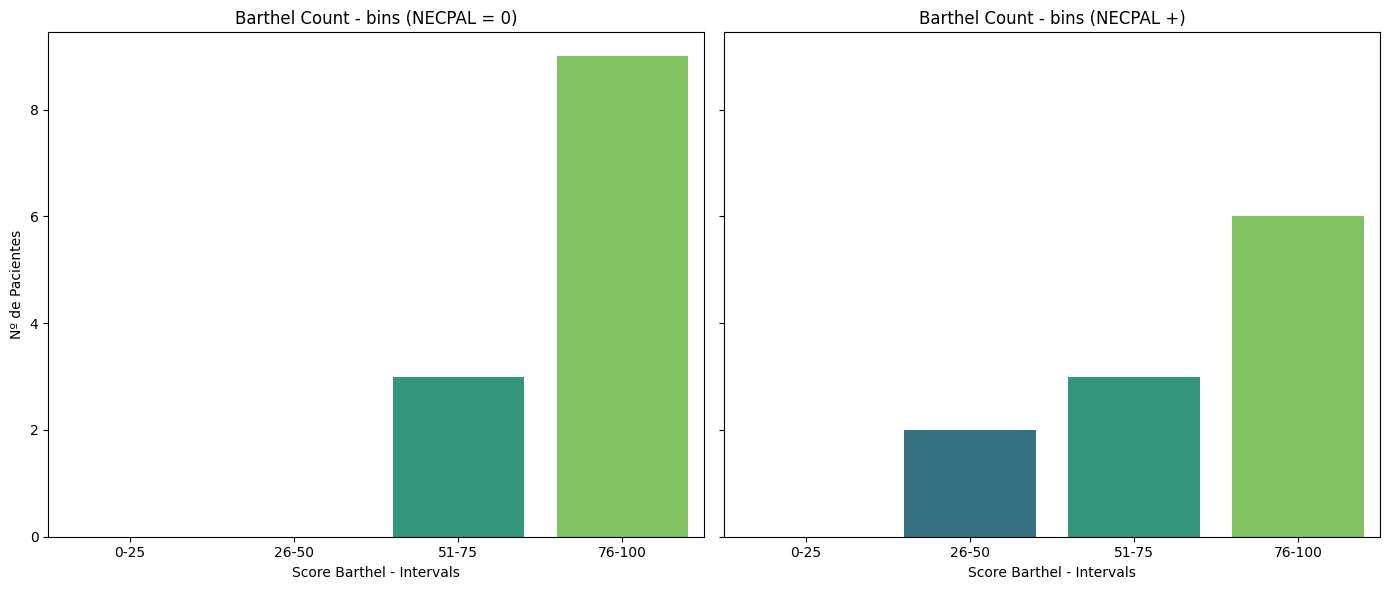

In [16]:
bins = [0, 25, 50, 75, 100] 
labels = ['0-25', '26-50', '51-75', '76-100']

necpal_0 = resultados[resultados['NECPAL'] == 0]
necpal_1 = resultados[resultados['NECPAL'] == 1]

necpal_0['Barthel_bins'] = pd.cut(necpal_0['Barthel'], bins=bins, labels=labels)
necpal_1['Barthel_bins'] = pd.cut(necpal_1['Barthel'], bins=bins, labels=labels)

barthel_counts_0 = necpal_0['Barthel_bins'].value_counts().sort_index()
barthel_counts_1 = necpal_1['Barthel_bins'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(x=barthel_counts_0.index, y=barthel_counts_0.values, palette="viridis", ax=axes[0])
axes[0].set_title('Barthel Count - bins (NECPAL = 0)')
axes[0].set_xlabel('Score Barthel - Intervals')
axes[0].set_ylabel('Nº de Pacientes')

sns.barplot(x=barthel_counts_1.index, y=barthel_counts_1.values, palette="viridis", ax=axes[1])
axes[1].set_title('Barthel Count - bins (NECPAL +)')
axes[1].set_xlabel('Score Barthel - Intervals')

plt.tight_layout()
plt.savefig('barthel_intervalos_necpal_side_by_side.png')
plt.show()

/tmp/ipykernel_21618/548255414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  necpal_0['PPS_bins'] = pd.cut(necpal_0['PPS'], bins=bins, labels=labels)
/tmp/ipykernel_21618/548255414.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  necpal_1['PPS_bins'] = pd.cut(necpal_1['PPS'], bins=bins, labels=labels)
/tmp/ipykernel_21618/548255414.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` f

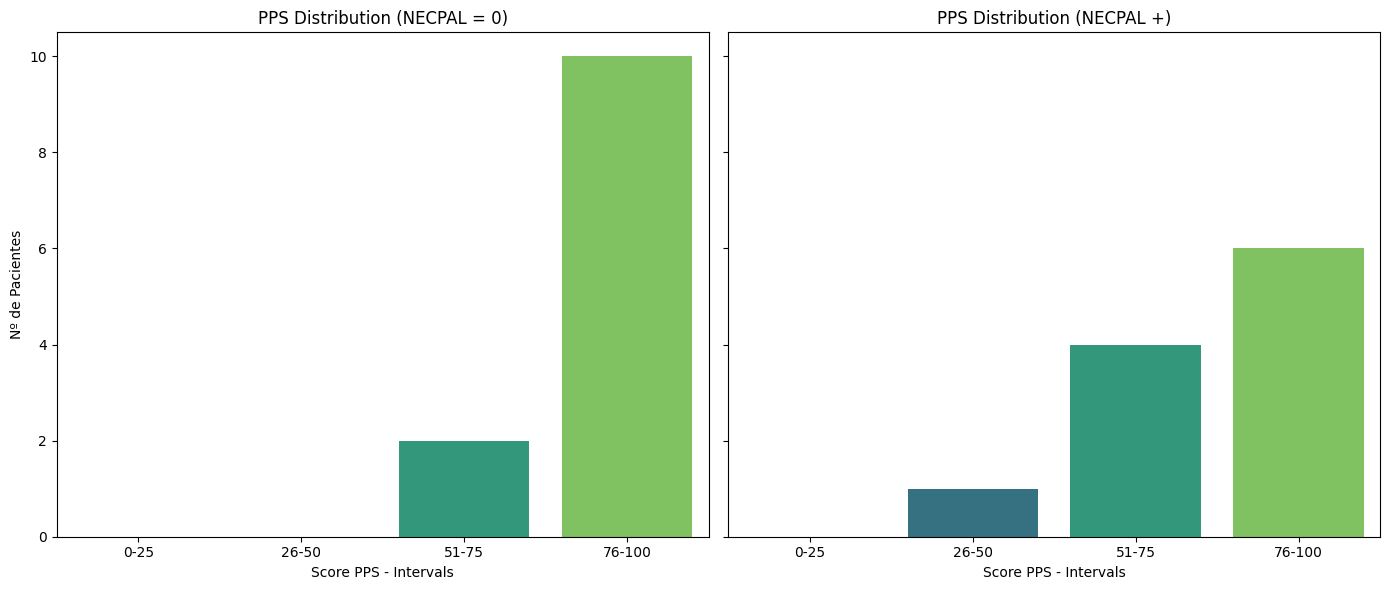

In [17]:
necpal_0 = resultados[resultados['NECPAL'] == 0]
necpal_1 = resultados[resultados['NECPAL'] == 1]

necpal_0['PPS_bins'] = pd.cut(necpal_0['PPS'], bins=bins, labels=labels)
necpal_1['PPS_bins'] = pd.cut(necpal_1['PPS'], bins=bins, labels=labels)

pps_counts_0 = necpal_0['PPS_bins'].value_counts().sort_index()
pps_counts_1 = necpal_1['PPS_bins'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(x=pps_counts_0.index, y=pps_counts_0.values, palette="viridis", ax=axes[0])
axes[0].set_title('PPS Distribution (NECPAL = 0)')
axes[0].set_xlabel('Score PPS - Intervals')
axes[0].set_ylabel('Nº de Pacientes')

sns.barplot(x=pps_counts_1.index, y=pps_counts_1.values, palette="viridis", ax=axes[1])
axes[1].set_title('PPS Distribution (NECPAL +)')
axes[1].set_xlabel('Score PPS - Intervals')

plt.tight_layout()
plt.savefig('pps_intervalos_necpal_side_by_side.png')
plt.show()

# Stats

## Normality

In [18]:
print("Normality Test:")
for score in ['Barthel', 'PPS', 'NECPAL']:
    stat, p = shapiro(resultados[score])
    print(f"{score} - Statistics={stat:.3f}, p-value={p:.3f}")

print("\nSkewness and Kurtosis:")
for score in ['Barthel', 'PPS', 'NECPAL']:
    score_skewness = skew(resultados[score])
    score_kurtosis = kurtosis(resultados[score], fisher=True)  # Fisher=True returns excess kurtosis
    print(f"{score} - Skewness={score_skewness:.3f}, Kurtosis={score_kurtosis:.3f}")


Normality Test:
Barthel - Statistics=0.901, p-value=0.000
PPS - Statistics=0.922, p-value=0.001
NECPAL - Statistics=0.914, p-value=0.001

Skewness and Kurtosis:
Barthel - Skewness=-0.495, Kurtosis=-1.095
PPS - Skewness=-0.042, Kurtosis=-1.210
NECPAL - Skewness=0.560, Kurtosis=-0.264


In [19]:
# All three scores do not follow a normal distribution, as already observed

## Correlation between scores

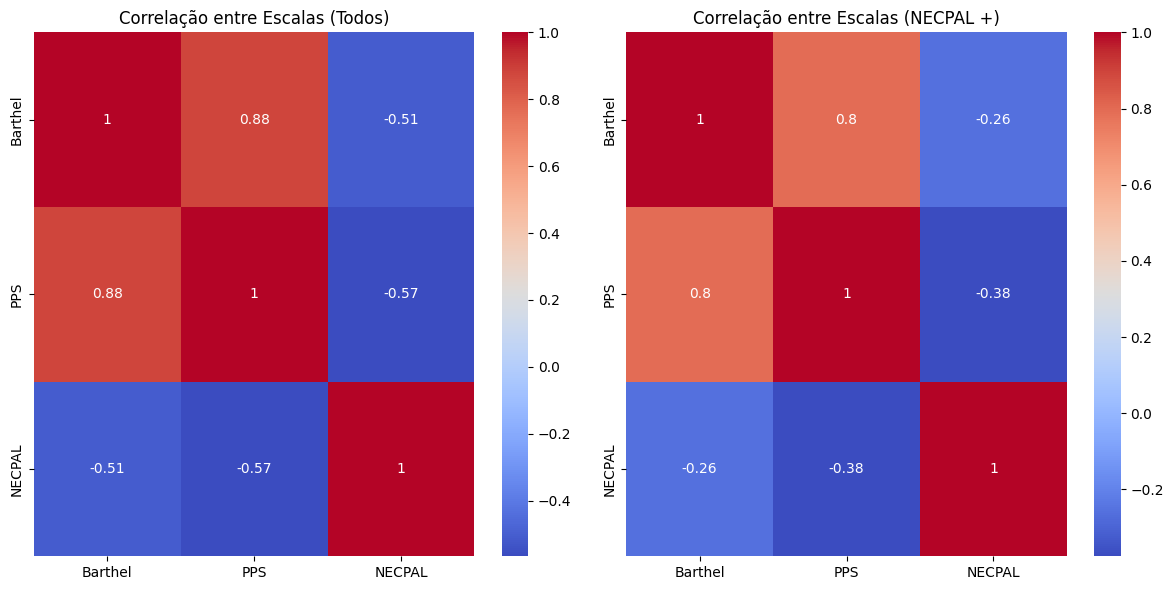

In [20]:
score_data = resultados[['Barthel', 'PPS', 'NECPAL']]
correlation_matrix_all = score_data.corr(method='spearman')

necpal_positive = resultados[resultados['NECPAL +'] == 1]
scores_necpal_positive = necpal_positive[['Barthel', 'PPS', 'NECPAL']]

correlation_matrix_necpal_positive = scores_necpal_positive.corr(method='spearman')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlação entre Escalas (Todos)')

sns.heatmap(correlation_matrix_necpal_positive, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlação entre Escalas (NECPAL +)')

plt.tight_layout()
plt.savefig('correlacoes_necpal_positive.png')
plt.show()

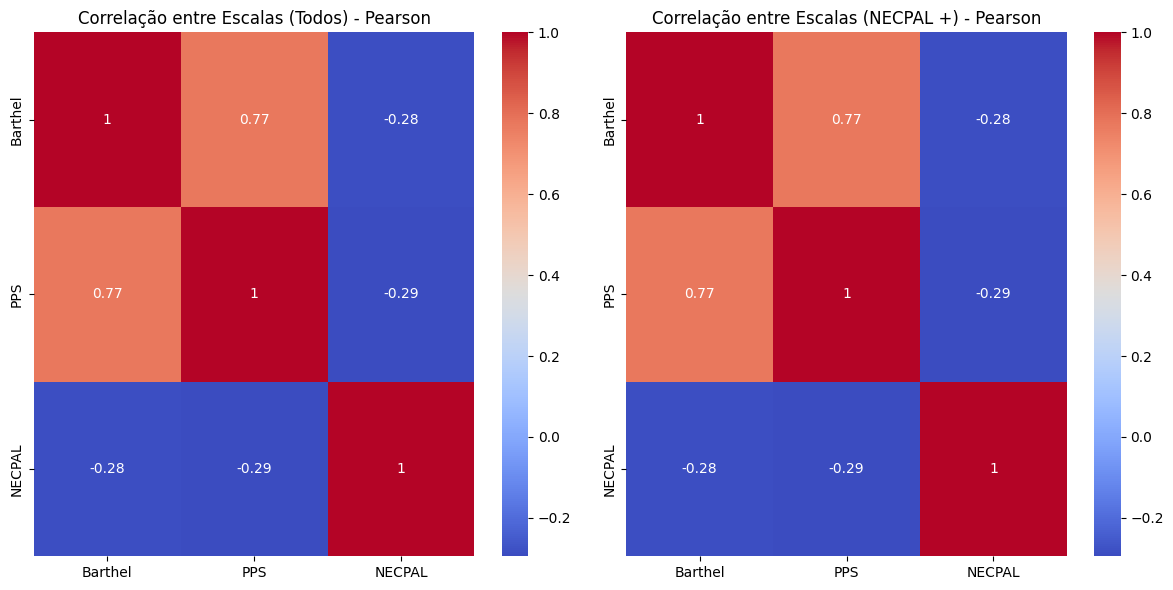

In [21]:
correlation_matrix_necpal_positive_pearson = scores_necpal_positive.corr(method='pearson')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(correlation_matrix_necpal_positive_pearson, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlação entre Escalas (Todos) - Pearson')

sns.heatmap(correlation_matrix_necpal_positive_pearson, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlação entre Escalas (NECPAL +) - Pearson')

plt.tight_layout()
plt.savefig('correlacoes_necpal_positive_pearson.png')
plt.show()

## Sex and Scores

### Correlation

In [143]:
print(resultados.dtypes)
resultados['sexo'] = resultados['sexo'].astype('category')


codigo_participante         int64
sexo                        int64
idade                       int64
Barthel                     int64
pergunta_surpresa           int64
NECPAL                      int64
NECPAL +                    int64
oncologica                  int64
pulmonar                    int64
cardiaca                    int64
demencia                    int64
fragilidade                 int64
neurologica_vascular        int64
neurologica_degenerativa    int64
hepatica                    int64
insuficiencia_renal         int64
PPS                         int64
dtype: object


In [144]:
for score in ['Barthel', 'PPS', 'NECPAL']:
    correlation, p_value = spearmanr(resultados['idade'], resultados[score])
    print(f"Spearman correlation between Age and {score}: {correlation:.3f}, p-value={p_value:.3f}")


Spearman correlation between Age and Barthel: -0.111, p-value=0.410
Spearman correlation between Age and PPS: -0.151, p-value=0.263
Spearman correlation between Age and NECPAL: -0.026, p-value=0.848


### Differences between sex

In [145]:
for score in ['Barthel', 'PPS', 'NECPAL']:
    male_scores = resultados[resultados['sexo'] == 0][score]
    female_scores = resultados[resultados['sexo'] == 1][score]
    stat, p_value = mannwhitneyu(male_scores, female_scores, alternative='two-sided')
    print(f"Mann-Whitney test between sexes for {score}: U-statistic={stat}, p-value={p_value:.3f}")


Mann-Whitney test between sexes for Barthel: U-statistic=498.0, p-value=0.064
Mann-Whitney test between sexes for PPS: U-statistic=491.0, p-value=0.079
Mann-Whitney test between sexes for NECPAL: U-statistic=381.5, p-value=0.960


In [146]:
# Barthel - males having higher scores?